In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")


In [23]:
# Load dataset
df = pd.read_csv('../data/mallcostumer.csv')

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
# Dataset info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
# Select features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


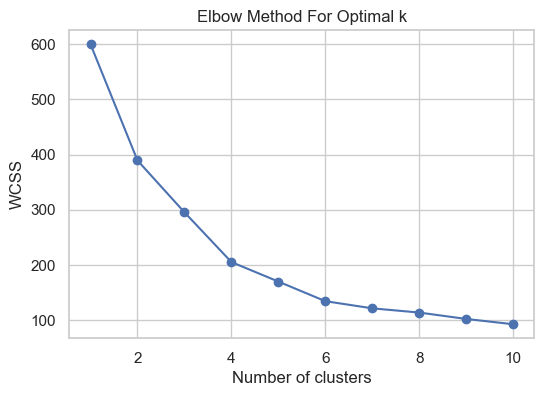

In [26]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs k
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig("../output/plot/elbow_plot.png")  # ✅ Save plot here
plt.show()


In [33]:
import joblib  # ✅ Make sure this is at the top of your notebook

# Apply KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Save the model
joblib.dump(kmeans, '../output/models/kmeans_model.pkl')  # ✅ Save model here


['../output/models/kmeans_model.pkl']

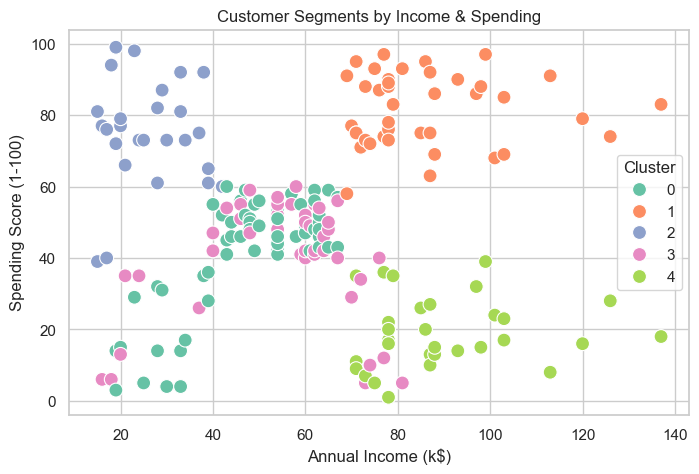

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                palette='Set2', data=df, s=100)
plt.title('Customer Segments by Income & Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig("../output/plot/cluster_plot.png")  # ✅ Save plot here
plt.show()


In [35]:
import joblib

# Corrected path
loaded_model = joblib.load('../output/models/kmeans_model.pkl')

# Optional: use the model
clusters = loaded_model.predict(scaled_features)
print(clusters[:5])


[2 2 3 2 2]
